In [209]:
import spotipy
import tekore as tk
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import sys
import pprint
import json
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

import pyodbc
import urllib
from sqlalchemy import create_engine
import pandas as pd

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="*****************************",
                                                           client_secret="*****************************"))

In [210]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [211]:
### Connecting to SQL DB
server = 'umg-nashville-eda.database.windows.net'
database = 'Artists'
username = 'a.monteagudo'
password = '{Azujikmlop123}'   
driver= '{ODBC Driver 18 for SQL Server}'

conn = f"""Driver={driver};Server=tcp:{server},1433;Database={database};
Uid={username};Pwd={password};Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30;"""

params = urllib.parse.quote_plus(conn)
conn_str = 'mssql+pyodbc:///?autocommit=true&odbc_connect={}'.format(params)
engine = create_engine(conn_str, echo=True)


artist_id | artist_name
    \/
artist_id | album_id
               \/
song_id  |  album_id | tempo | ... |

In [ ]:
# Read song_audio_features data from SQL DB into Pandas Dataframe
df = pd.read_sql_query('SELECT * FROM [dbo].[song_audio_features]', engine)

# Read release date data in the SQL table album_list into Pandas Dataframe
album_df = pd.read_sql_query('SELECT [id],[release_date],[release_date_precision] FROM [dbo].[album_list]', engine)


ALBUM TABLE   artist_id | album_id | date_released
                                          ||
                                          ||
                                          \/
SONG TABLE    song_id  |  album_id  | date_released |

In [224]:
# Adds alblum relase year of the ablum for each song in the 
# TODO inner join on album_id

df['year'] = 0
df['year'] = df.apply(lambda row: album_df.loc[album_df['id'] == row['album_id'], 'release_date'].values[0][0:4] 
                      if row['album_id'] in album_df['id'].tolist() else None, axis=1)

#df = df.apply(lambda row: result = sp.search(q='artist:' + row['Names'], type='artist'), axis=1)



df.dropna(inplace=True)
df['year'] = df['year'].astype(int)
print(df['year'].describe())

count    3787.000000
mean     2009.614471
std         9.239707
min      1981.000000
25%      2003.000000
50%      2012.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64


In [188]:
### adds a column with a number that corresponds to an artist's name 
### this colum is used as a label for the artist in the graph

df['artist_index'] = 0
name_set = sorted(df['artist_name'].unique())

for index, row in df.iterrows():
    df['artist_index'][index] = name_set.index(row['artist_name'])


C:\Users\alex\AppData\Local\Temp\ipykernel_8188\120998260.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [225]:
### creates dataframes 
### df_top_by_year: data frame of the top 20 songs for each year
### df_high_popularity: data frame of songs with popularity > 20
### most_prolific_artists_songs: data frame of the top 'x' most prolific artists with popularity > 'y'


df_grouped = df.groupby(['year']).apply(lambda x: x.sort_values(by=['popularity'], ascending=False))
df_top_by_year = df_grouped.groupby(level=0).head(20).reset_index(drop=True)
df_top_by_year.sort_values(by=['year'], inplace=True)


df_high_popularity = df[df['popularity'] > 20]


# Creates a new dataframe that groups songs by artist and counts the number of songs per artist
artist_counts = df_high_popularity.groupby('artist_name').count()
most_prolific_artists = artist_counts['popularity'].sort_values(ascending=False).head(5)
most_prolific_artists_songs = df[df['artist_name'].isin(most_prolific_artists.index)]




print('df len', len(df))
print('df_top_by_year len', len(df_top_by_year))
print('df_high_popularity len', len(df_high_popularity))
print('df len', len(most_prolific_artists_songs))
print('df_high_popularity len', df_high_popularity.info())
print(most_prolific_artists_songs.groupby('artist_name').count())




df len 3787
df_top_by_year len 760
df_high_popularity len 2651
df len 1874
               album_id   id  name  duration_ms_x  popularity  danceability  \
artist_name                                                                   
Alan Jackson        382  382   382            382         382           382   
Eric Church         285  285   285            285         285           285   
George Strait       698  698   698            698         698           698   
Luke Bryan          222  222   222            222         222           222   
Shania Twain        287  287   287            287         287           287   

               energy  key  loudness  mode  ...  liveness  valence  tempo  \
artist_name                                 ...                             
Alan Jackson      382  382       382   382  ...       382      382    382   
Eric Church       285  285       285   285  ...       285      285    285   
George Strait     698  698       698   698  ...       698      

Artist list idea

Add a artist num column to df based on the artist_name value index in the name_set list
    use that to color the data points

array([[<AxesSubplot: title={'center': 'duration_ms_x'}>,
        <AxesSubplot: title={'center': 'popularity'}>,
        <AxesSubplot: title={'center': 'danceability'}>],
       [<AxesSubplot: title={'center': 'energy'}>,
        <AxesSubplot: title={'center': 'key'}>,
        <AxesSubplot: title={'center': 'loudness'}>],
       [<AxesSubplot: title={'center': 'mode'}>,
        <AxesSubplot: title={'center': 'speechiness'}>,
        <AxesSubplot: title={'center': 'acousticness'}>],
       [<AxesSubplot: title={'center': 'instrumentalness'}>,
        <AxesSubplot: title={'center': 'liveness'}>,
        <AxesSubplot: title={'center': 'valence'}>],
       [<AxesSubplot: title={'center': 'tempo'}>,
        <AxesSubplot: title={'center': 'duration_ms_y'}>,
        <AxesSubplot: title={'center': 'time_signature'}>],
       [<AxesSubplot: title={'center': 'year'}>, <AxesSubplot: >,
        <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <

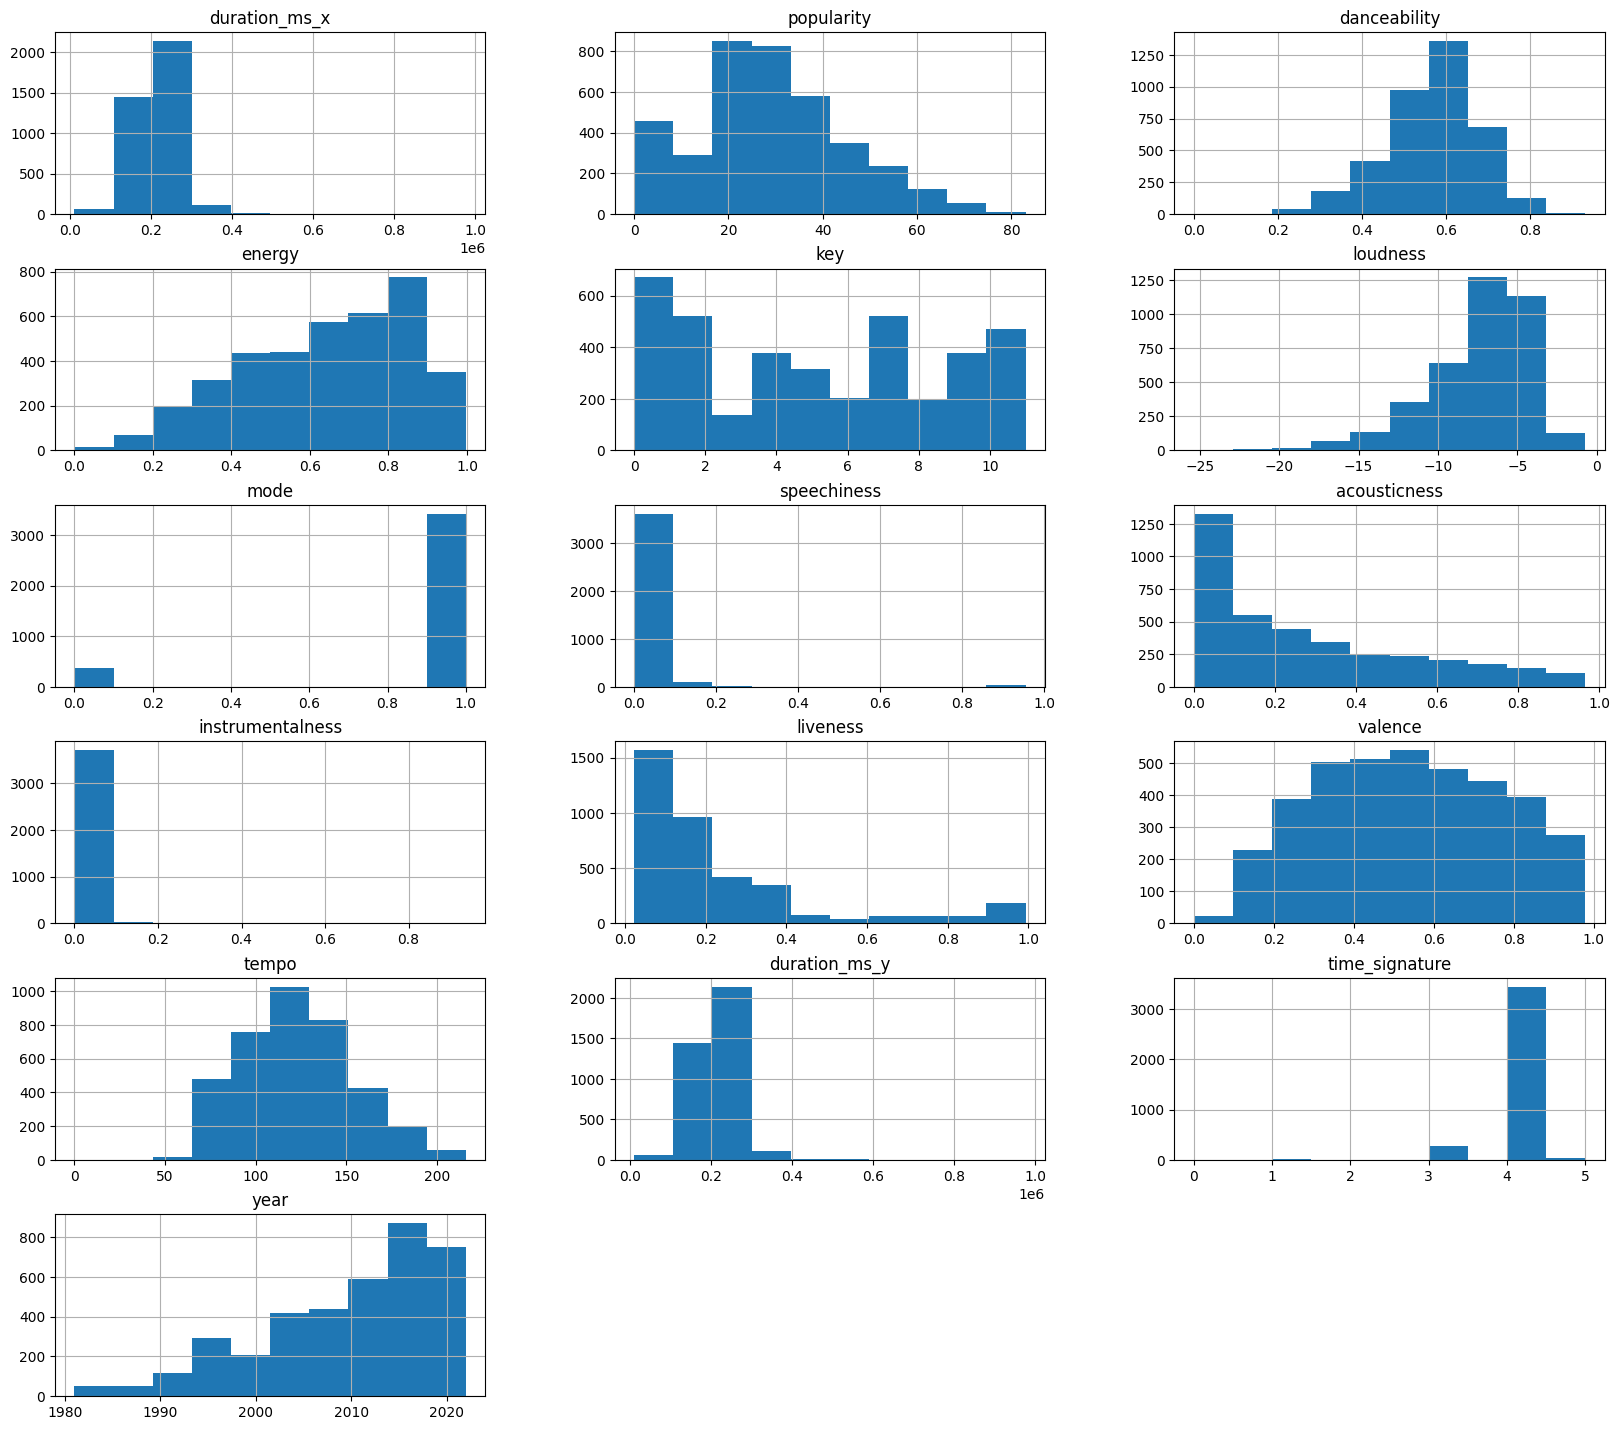

In [8]:
# TODO:
#    mention that it is normalised
#    add ledgend
df.hist(layout=(10,3),figsize=(20, 30))



<Figure size 1600x800 with 0 Axes>

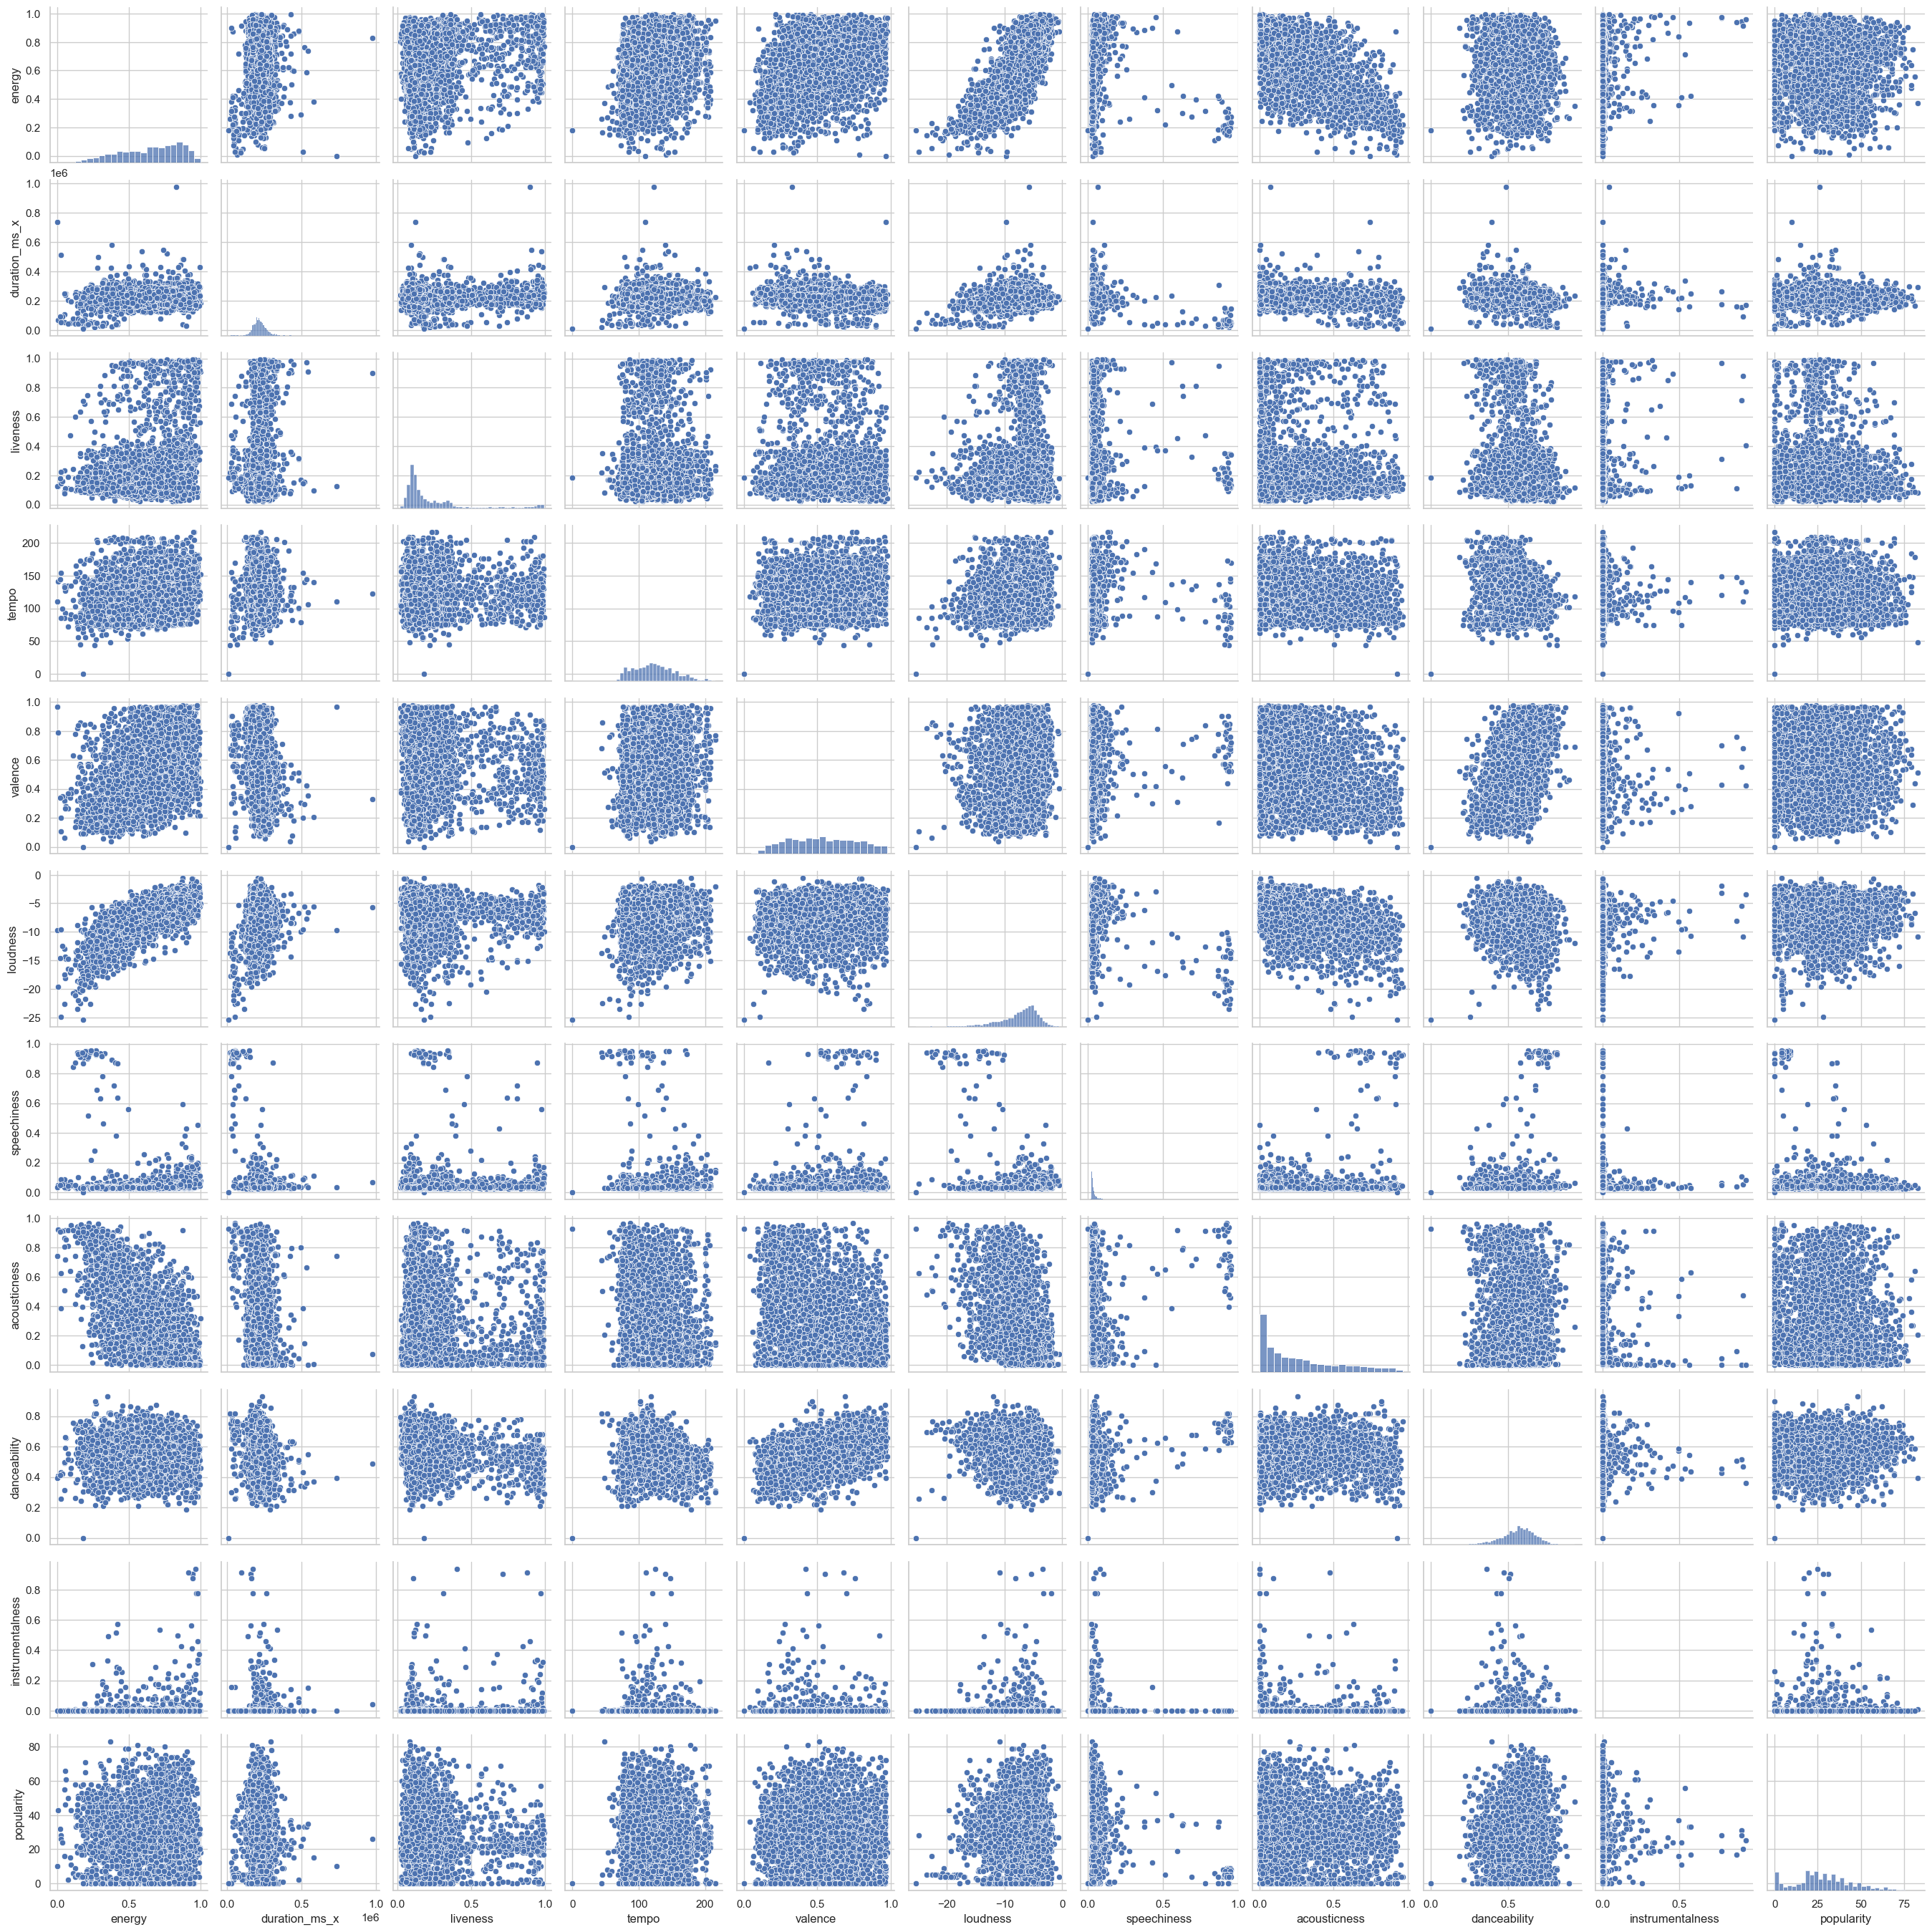

In [21]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
cols = ["energy", "duration_ms_x", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness", "year", "popularity"]
sns.pairplot(df[cols], height = 2.5 )
plt.show();

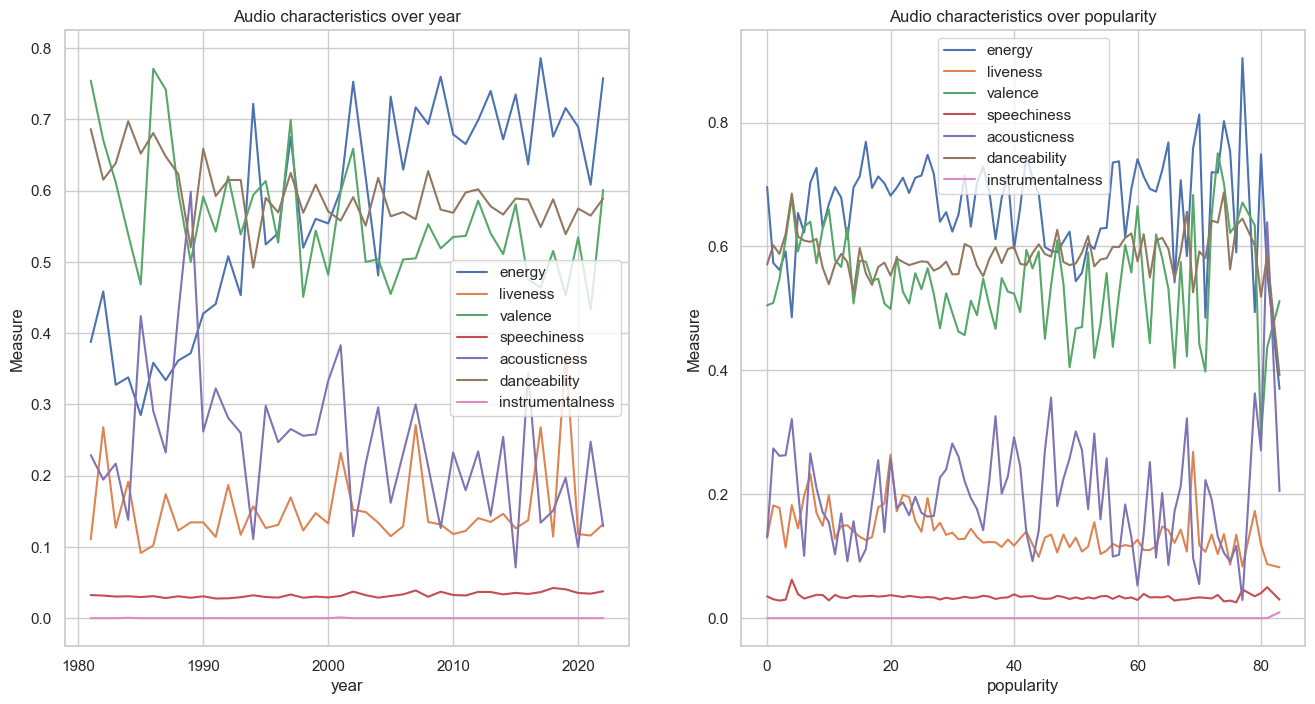

In [9]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["energy", "liveness", "valence", "speechiness", "acousticness", "danceability", "instrumentalness"]
groupby_vars = ['year', 'popularity']

for i, groupby_var in enumerate(groupby_vars):
    ax = plt.subplot(1, len(groupby_vars), i+1)
    for col in columns:
        x = df.groupby(groupby_var)[col].median()
        sns.lineplot(x=x.index, y=x, label=col, ax=ax)
    ax.set_title(f'Audio characteristics over {groupby_var}')
    ax.set_ylabel('Measure')
    ax.set_xlabel(groupby_var)
    ax.legend()

In [1]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["popularity"]
groupby_vars = ['year']

for i, groupby_var in enumerate(groupby_vars):
    ax = plt.subplot(1, len(groupby_vars), i+1)
    for col in columns:
        x = df.groupby(groupby_var)[col].median()
        sns.lineplot(x=x.index, y=x, label=col, ax=ax)
    ax.set_title(f'Audio characteristics over {groupby_var}')
    ax.set_ylabel('Measure')
    ax.set_xlabel(groupby_var)
    ax.legend()

NameError: name 'plt' is not defined

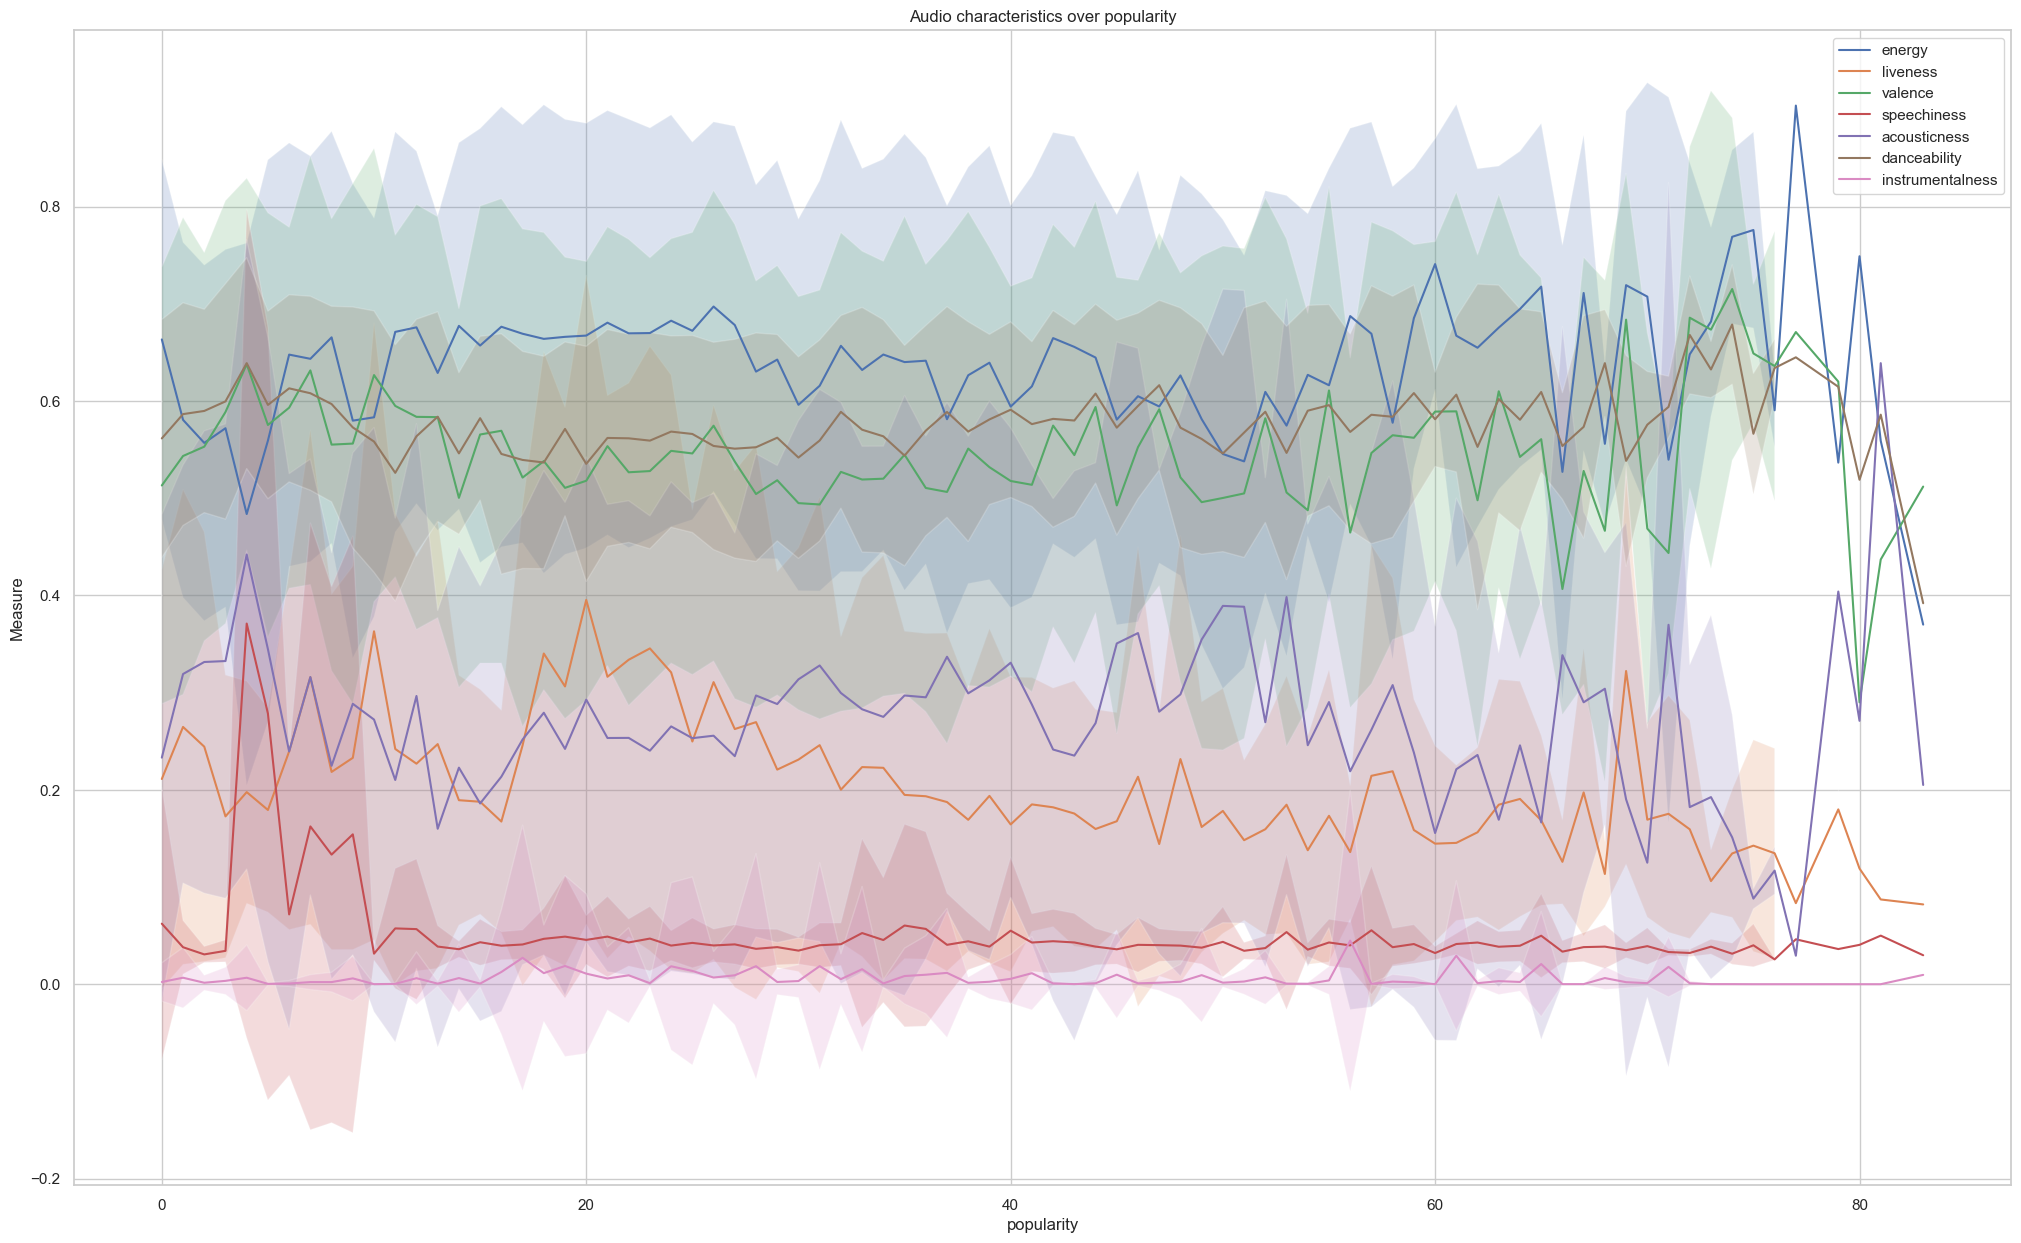

In [207]:
plt.figure(figsize=(25, 15))
sns.set(style="whitegrid")
columns = ["energy", "liveness", "valence", "speechiness", "acousticness", "danceability", "instrumentalness"]
groupby_vars = ['popularity']

for i, groupby_var in enumerate(groupby_vars):
    ax = plt.subplot(1, len(groupby_vars), i+1)
    for col in columns:
        x = df.groupby(groupby_var)[col].mean()
        y = df.groupby(groupby_var)[col].std()
        sns.lineplot(x=x.index, y=x, label=col, ax=ax)
        ax.fill_between(x.index, x-y, x+y, alpha=0.2)
    ax.set_title(f'Audio characteristics over {groupby_var}')
    ax.set_ylabel('Measure')
    ax.set_xlabel(groupby_var)
    ax.legend()


In [65]:
for col1, col2 in zip(work_df.columns, df_unique.columns):
    if work_df[col1].dtypes == int or work_df[col1].dtypes == float:
        var1 = work_df[col1].mean() 
        var2 = df_unique[col2].mean()
        print (f"Column {col1} in the two data frames has variance {var1} and {var2} respectively.")
        if var1 == var2:
            print(f"Column {col1} in both data frames has the same variance.")
        else:
            print(f"Column {col1} in the two data frames has different variance.")

Column danceability in the two data frames has variance 0.5684327964087668 and 0.5823333333333334 respectively.
Column danceability in the two data frames has different variance.
Column energy in the two data frames has variance 0.6419215283865857 and 0.6213333333333332 respectively.
Column energy in the two data frames has different variance.
Column loudness in the two data frames has variance -7.4574982836017965 and -6.223266666666666 respectively.
Column loudness in the two data frames has different variance.
Column speechiness in the two data frames has variance 0.051140401373118566 and 0.036366666666666665 respectively.
Column speechiness in the two data frames has different variance.
Column acousticness in the two data frames has variance 0.2773715817533668 and 0.2642466666666667 respectively.
Column acousticness in the two data frames has different variance.
Column instrumentalness in the two data frames has variance 0.007454972500660153 and 0.0042088433333333335 respectively.
C

In [ ]:
sum_stat = df.groupby('artist_name')['popularity'].apply(list)
sum_stat.sort_values('artist_name')
print(sum_stat)
#print(sum_stat)
# sum_stat.sort_values('artist_name')
# sum_stat = sum_stat.xs('popularity', axis=1, drop_level=True)
# sum_stat['name'] = name_set
# print(sum_stat)


ValueError: No axis named artist_name for object type Series

In [ ]:
print(df_high_popularity['instrumentalness'].describe())

count    2704.000000
mean        0.007211
std         0.050210
min         0.000000
25%         0.000000
50%         0.000003
75%         0.000139
max         0.937000
Name: instrumentalness, dtype: float64


In [ ]:
### TODO 
df_alan_jackson = df[df['artist_name'] == 'Alan Jackson']
print(len(df_alan_jackson))
print(df.info())


382
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3939 entries, 2198 to 3331
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       3939 non-null   object 
 1   album_id          3939 non-null   object 
 2   id                3939 non-null   object 
 3   name              3939 non-null   object 
 4   duration_ms_x     3939 non-null   int64  
 5   popularity        3939 non-null   int64  
 6   danceability      3939 non-null   float64
 7   energy            3939 non-null   float64
 8   key               3939 non-null   int64  
 9   loudness          3939 non-null   float64
 10  mode              3939 non-null   int64  
 11  speechiness       3939 non-null   float64
 12  acousticness      3939 non-null   float64
 13  instrumentalness  3939 non-null   float64
 14  liveness          3939 non-null   float64
 15  valence           3939 non-null   float64
 16  tempo             3939 non-null   f

In [226]:
working_df = df_high_popularity
working_df.sort_values('popularity', ascending=False)
color = working_df['year']

# chosen = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
chosen = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness", "popularity"]


text1 = working_df["artist_name"] + " - " + working_df["name"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = working_df[chosen].values
#y = working_df["year"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import matplotlib
import matplotlib.cm as cm

#working_df['year'] = pd.DatetimeIndex(working_df['year']).year
working_df['year'] = working_df['year'].astype(int)

# Assign a color value to each point based its max/min
year_min = color.min()
year_max = color.max()
norm = matplotlib.colors.Normalize(vmin=year_min, vmax=year_max, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='plasma')
working_df['color'] = working_df['year'].apply(lambda x: mapper.to_rgba(x))

# Update the marker color value to use the new 'color' column
trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=4,
        color=working_df['color'].values
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")


C:\Users\alex\AppData\Local\Temp\ipykernel_8188\1642807240.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\alex\AppData\Local\Temp\ipykernel_8188\1642807240.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
# k means cluster

working_df = work_df
# chosen = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]

chosen = ["energy", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness", 'duration_ms_x']



text1 = working_df["artist_name"] + " - " + working_df["name"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = working_df[chosen].values


min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import matplotlib
import matplotlib.cm as cm

# Create a new column 'year' in the dataframe that contains the year of each song release date
working_df['year'] = pd.DatetimeIndex(working_df['year']).year

# Assign a color value to each point based on the year it was released
year_min = working_df['unique'].min()
year_max = working_df['unique'].max()
norm = matplotlib.colors.Normalize(vmin=year_min, vmax=year_max, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='plasma')
working_df['color'] = working_df['unique'].apply(lambda x: mapper.to_rgba(x))

# Update the marker color value to use the new 'color' column
trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=4,
        color=working_df['color'].values
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")


In [140]:
working_df = df_unique
chosen = ["energy", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness", 'duration_ms_x']

#chosen = [ "liveness", "tempo", "valence", "speechiness", "danceability", "instrumentalness"]


text1 = working_df["artist_name"] + " - " + working_df["name"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = working_df[chosen].values
y = working_df["date"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import matplotlib
import matplotlib.cm as cm

# Create a new column 'year' in the dataframe that contains the year of each song release date
working_df['date'] = pd.DatetimeIndex(working_df['date']).year

# Assign a color value to each point based on the year it was released
year_min = working_df['date'].min()
year_max = working_df['date'].max()
norm = matplotlib.colors.Normalize(vmin=year_min, vmax=year_max, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap='plasma')
working_df['color'] = working_df['date'].apply(lambda x: mapper.to_rgba(x))

# Update the marker color value to use the new 'color' column
trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=4,
        color=working_df['color'].values
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")


In [30]:

working_df = work_df


import time
import matplotlib
import matplotlib.cm as cm

["energy", "tempo", "valence", "loudness", "danceability", "instrumentalness", 'duration_ms_x']
X = working_df[chosen].values
working_df['unique'] = ~working_df['unique'].astype(int)
y = working_df["unique"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)



time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

fig = {
    "data": [
        {
            "x": tsne_results[:, 0],
            "y": tsne_results[:, 1],
            "text": y,
            "mode": "markers",
            "marker": {"size": 7, "color": y }
        }
    ],
    "layout": {
        "xaxis": {"title": "x-tsne"},
        "yaxis": {"title": "y-tsne"}
    }
}

py.iplot(fig, filename="test-graph2")


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3787 samples in 0.005s...
[t-SNE] Computed neighbors for 3787 samples in 0.191s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3787
[t-SNE] Computed conditional probabilities for sample 2000 / 3787
[t-SNE] Computed conditional probabilities for sample 3000 / 3787
[t-SNE] Computed conditional probabilities for sample 3787 / 3787
[t-SNE] Mean sigma: 0.093181
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.895523
[t-SNE] KL divergence after 300 iterations: 2.096499
t-SNE done! Time elapsed: 3.960747241973877 seconds


In [240]:
### Random forest Classifier

working_df = pd.DataFrame(df, columns=["artist_name", "energy", "liveness", "tempo", "valence", "key", "mode", "time_signature", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness", "year", "popularity"])
working_df['danceability'] = np.round(working_df['danceability']/10)*10
# Define features and target
X = working_df[["liveness", "tempo", "valence", "year", "speechiness", "acousticness", "loudness", "instrumentalness", "popularity"]]
y = working_df["danceability"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create decision tree classifier
clf = DecisionTreeClassifier(random_state=0)

# Train classifier
clf.fit(X_train, y_train)


# Make predictions on test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

# Plot the decision tree
#tree.plot_tree(clf, filled=True, precision=3, proportion=True);

# tree.plot_tree(clf, feature_names=X.columns, class_names=y.unique(), filled=True, precision=3, proportion=True);


Accuracy: 100.00%


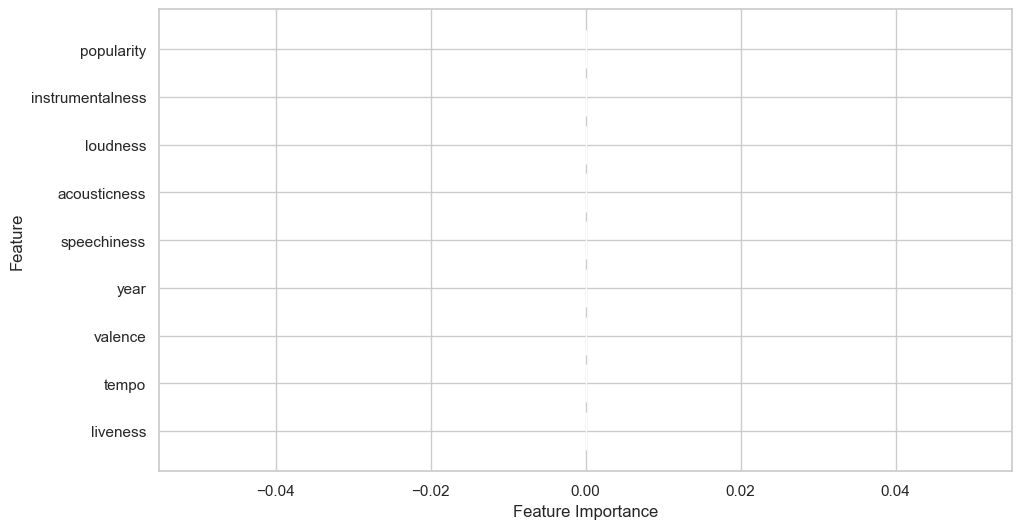

In [241]:
### Visualize feature importances


importances = clf.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(importances)

# Create a bar plot of feature importances
plt.barh(range(X_train.shape[1]), importances[sorted_idx])
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

C:\Users\alex\AppData\Local\Temp\ipykernel_8188\636475002.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



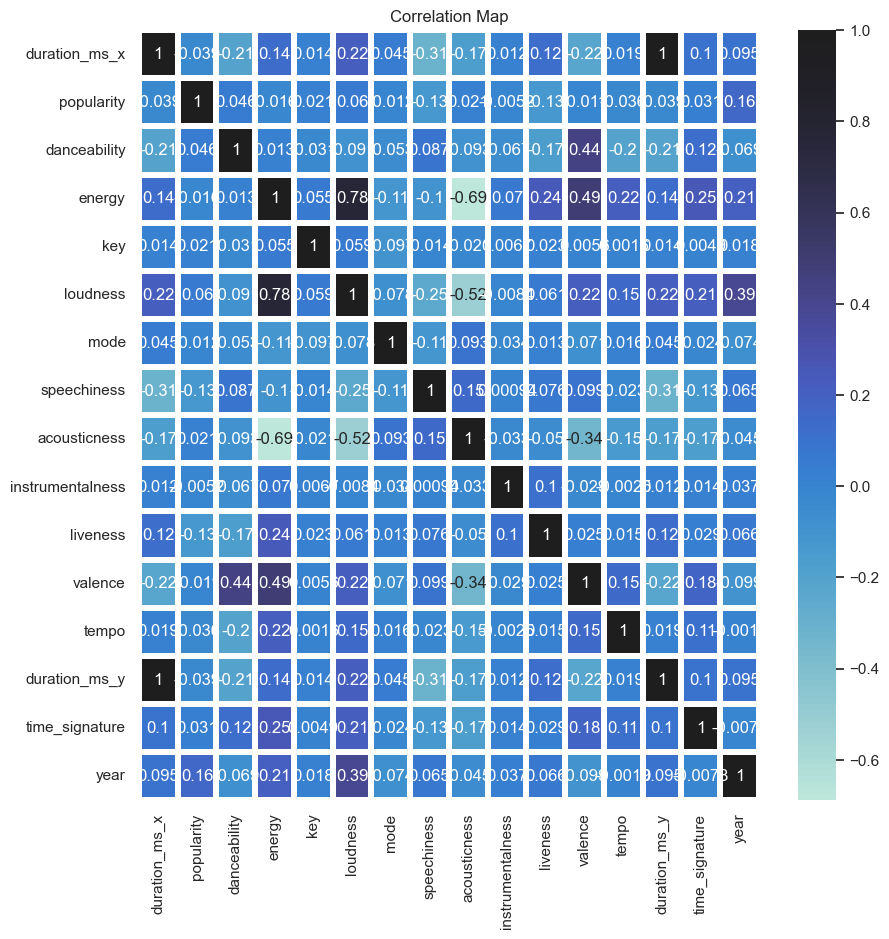

In [95]:
#Heatmap
plt.figure(figsize=(10,10))
plt.title('Correlation Map')
ax=sns.heatmap(df.corr(),
               linewidth=3.1,
               annot=True,
               center=1)